# Nubes de palabras (Wordcloud)

In [1]:
# generar nubes de palabras (argumentos necesarios: file_path y icon_name)
import stylecloud
stylecloud.gen_stylecloud(file_path='SJ-Discurso.txt',
                          icon_name='fab fa-apple',
                          colors='white',
                          background_color='black',
                          output_name='manzana-1.png',
                          collocations=False)

# Nubes de palabras sin Stopwords

In [2]:
from stop_words import get_stop_words
# stopwords en español
palabras_irrelevantes = get_stop_words('spanish')

# agregar palabra a la lista
palabras_irrelevantes.append('manzana')
# quitar palabra de la lista
palabras_irrelevantes.remove('manzana')

In [3]:
# nube de palabras omitiendo stopwords
stylecloud.gen_stylecloud(file_path='SJ-Discurso.txt',
                          icon_name='fab fa-apple',
                          colors='white',
                          background_color='black',
                          output_name='manzana-2.png',
                          collocations=False,
                          custom_stopwords=palabras_irrelevantes)

In [4]:
# nube de palabras omitiendo stopwords y usando paleta de colores/colores html
stylecloud.gen_stylecloud(file_path='SJ-Discurso.txt',
                          icon_name='fab fa-apple',
#                           colors='#434FCF'
                          palette='cartocolors.qualitative.Pastel_3',
                          background_color='black',
                          output_name='manzana-3.png',
                          collocations=False,
                          custom_stopwords=palabras_irrelevantes)

# Agrega tu propia imagen

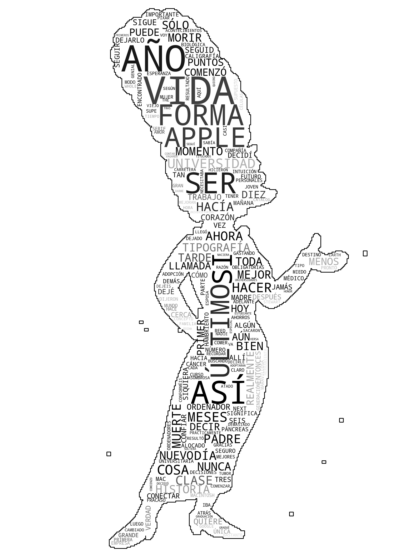

In [5]:
from wordcloud import WordCloud, ImageColorGenerator # crea el wordcloud
from PIL import Image # carga la imagen
import matplotlib.pyplot as plt # grafica imagenes
import numpy as np # obtener la forma de la imagen

# graficar nube de palabras con libreria wordcloud
my_mask = np.array(Image.open('marge.png')) # obtiene forma del wordcloud
wc = WordCloud(background_color='white',
               mask=my_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3, # especifica el ancho del contorno
               contour_color='black', # especifica el color del contorno
               stopwords=palabras_irrelevantes) # agregar stopwords

# leer el archivo txt
with open('SJ-Discurso.txt', 'r') as txt_file:
    texto = txt_file.read()
# generar nube de palabras
wc.generate(texto.upper())

# extraer colores de la imagen .png usada
image_colors = ImageColorGenerator(my_mask)
# usar el color de imagen original en la nube de palabras (puedes usar colores random en el wordcloud desactivando el código de abajo)
wc.recolor(color_func=image_colors)

# graficar la nube de palabras
plt.figure(figsize=(20, 10)) # tamaño de figura
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') # quitar ejes
wc.to_file('wordcloud.png') # guardar wordcloud
plt.show()